In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('airquality.csv')

In [3]:
df.sample(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
102,103,NaN,137.0,11.5,86,8,11,NaN
50,51,13.0,137.0,10.3,76,6,20,low
51,52,NaN,150.0,6.3,77,6,21,high
143,144,13.0,238.0,12.6,64,9,21,NaN
0,1,41.0,190.0,7.4,67,5,1,high
57,58,NaN,47.0,10.3,73,6,27,medium
134,135,21.0,259.0,15.5,76,9,12,NaN
82,83,NaN,258.0,9.7,81,7,22,NaN
18,19,30.0,322.0,11.5,68,5,19,medium
129,130,20.0,252.0,10.9,80,9,7,NaN


In [4]:
df = df.drop(columns='Unnamed: 0')
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,medium
2,12.0,149.0,12.6,74,5,3,low
3,18.0,313.0,11.5,62,5,4,medium
4,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,low
149,NaN,145.0,13.2,77,9,27,NaN
150,14.0,191.0,14.3,75,9,28,low
151,18.0,131.0,8.0,76,9,29,NaN


In [5]:
df.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity    72
dtype: int64

In [6]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())

In [7]:
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())

In [8]:
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])

# Since mode() returns a Series, we select the first element ([0]) from the Series,
# which corresponds to the first mode value. This ensures that we get a single value 
# to fill in for missing values.

In [9]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [10]:
df['Humidity'].unique()

array(['high', 'medium', 'low', ' '], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe = OneHotEncoder(sparse=False)

In [13]:
df['Humidity'] = df['Humidity'].astype('category') 
df['Humidity'] = df['Humidity'].cat.codes

In [14]:
df_ohc = ohe.fit_transform(df[['Humidity']])

C:\Users\panka\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
df['Humidity'].unique()

array([1, 3, 2, 0], dtype=int8)

In [16]:
data = pd.DataFrame(df_ohc,columns=['high', 'medium', 'low', 'space_cat'])

In [17]:
df=df.join(data)
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity,high,medium,low,space_cat
0,41.00000,190.000000,7.4,67,5,1,1,0.0,1.0,0.0,0.0
1,36.00000,118.000000,8.0,72,5,2,3,0.0,0.0,0.0,1.0
2,12.00000,149.000000,12.6,74,5,3,2,0.0,0.0,1.0,0.0
3,18.00000,313.000000,11.5,62,5,4,3,0.0,0.0,0.0,1.0
4,42.12931,185.931507,14.3,56,5,5,2,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,2,0.0,0.0,1.0,0.0
149,42.12931,145.000000,13.2,77,9,27,2,0.0,0.0,1.0,0.0
150,14.00000,191.000000,14.3,75,9,28,2,0.0,0.0,1.0,0.0
151,18.00000,131.000000,8.0,76,9,29,2,0.0,0.0,1.0,0.0


In [18]:
# from sklearn import preprocessing

In [19]:
# df['Humidity'].unique()

In [20]:
# labelEncoding = preprocessing.LabelEncoder()

In [21]:
# df['Humidity'] = labelEncoding.fit_transform(df['Humidity'])

In [22]:
# df.head()

In [23]:
# labelEncoding.classes_

In [24]:
# labelEncoding.transform(labelEncoding.classes_)

In [25]:
subset1 = df[['Temp', 'Ozone']]
subset2 = df[['Temp', 'Solar.R']]

In [26]:
merged_df = pd.concat([subset1, subset2.drop('Temp', axis=1)], axis=1)
merged_df

,Temp,Ozone,Solar.R
0,67,41.00000,190.000000
1,72,36.00000,118.000000
2,74,12.00000,149.000000
3,62,18.00000,313.000000
4,56,42.12931,185.931507
...,...,...,...
148,70,30.00000,193.000000
149,77,42.12931,145.000000
150,75,14.00000,191.000000
151,76,18.00000,131.000000


In [27]:
df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity,high,medium,low,space_cat
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,0.011795,-0.008875,-0.145104,0.218341,-0.150487
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,-0.080413,-0.095228,0.058232,0.061288,-0.127087
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,-0.069669,-0.070625,0.115447,-0.055715,-0.029010
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,-0.055810,0.026804,-0.156480,0.292692,-0.256625
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,0.030081,0.057824,-0.361489,0.493828,-0.325805
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,0.041924,-0.135901,-0.026260,0.076087,-0.040301
Humidity,0.011795,-0.080413,-0.069669,-0.055810,0.030081,0.041924,1.000000,-0.349045,-0.720608,0.177969,0.665365
high,-0.008875,-0.095228,-0.070625,0.026804,0.057824,-0.135901,-0.349045,1.000000,-0.027719,-0.167722,-0.023662
medium,-0.145104,0.058232,0.115447,-0.156480,-0.361489,-0.026260,-0.720608,-0.027719,1.000000,-0.706662,-0.099697
low,0.218341,0.061288,-0.055715,0.292692,0.493828,0.076087,0.177969,-0.167722,-0.706662,1.000000,-0.603244


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

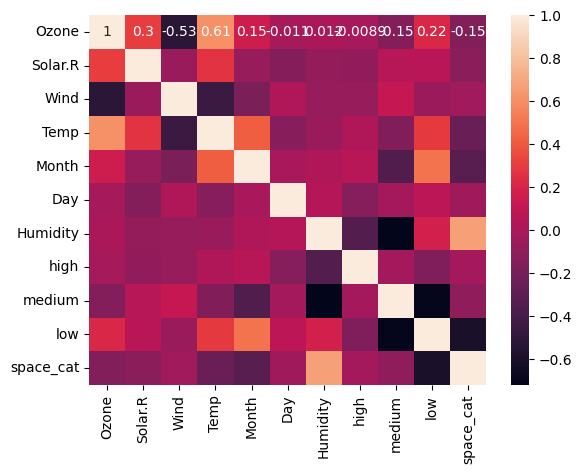

In [29]:
sns.heatmap(df.corr(), annot=True)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
x = df[['Ozone']]
y = df[['Temp']]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [32]:
model.coef_

array([[0.23430651]])

In [33]:
model.intercept_

array([68.37678729])

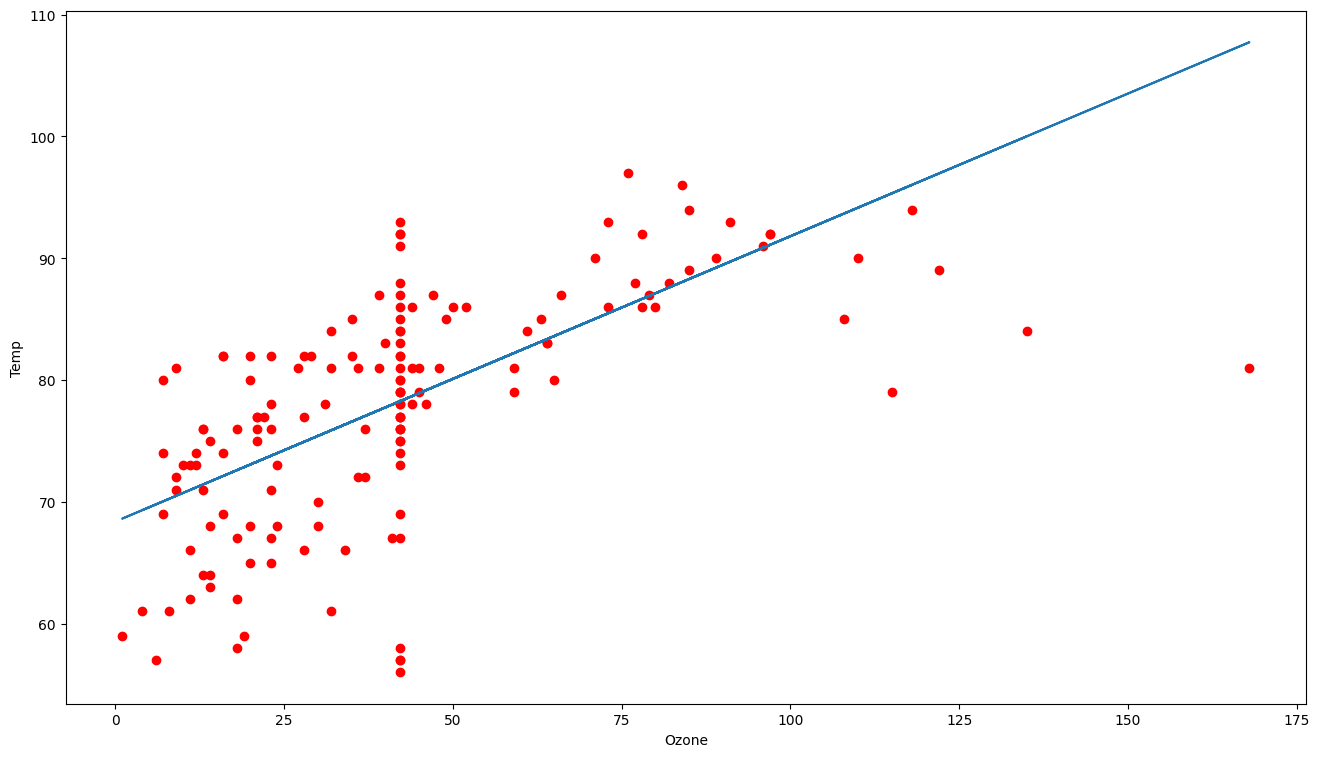

In [34]:
predict = model.predict(xtest)

plt.figure(figsize=(16,9))
plt.plot(xtest,predict)
plt.scatter(df['Ozone'], df['Temp'],  color='red')
plt.xlabel('Ozone')
plt.ylabel('Temp')

plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error

In [37]:
mse(ytest,predict)

82.61668757856462

In [38]:
import math

rmse=math.sqrt(mse(ytest,predict))
rmse

9.08937223236922